<img src="https://upload.wikimedia.org/wikipedia/en/5/5e/Munster_Technological_University_Logo%2C_2021.jpg">



> Orlando Jr.



> Data Science and Analytics - MTU.



> Mr. Aengus Daly


##Part 3 - Hands on EDA and Statical Modeling. In the end we will create a PICKLE file with our model to Depoy and Run Online

##Libs Import

In [1]:
#(EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.stats import norm

#import streamlit as st
import joblib

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Valuation
from sklearn.model_selection import train_test_split
#from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/orlandojrps/stream/main/df_final.csv")


##Explanatory Data Analysis

In [2]:
#First Inspection
df.head()


Address   Price  Beds  Baths  \
0             42 Grattan Street, Cork City, Co. Cork  265000     4      2   
1  1 Old Friary Place, Shandon Street, Cork City,...  275000     2      2   
2   179 Kilnap Place, Farranree, Farranree, Co. Cork  225000     3      1   
3    23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork  580000     5      3   
4  14 Crestfield Mews, Riverstown, Glanmire, Co. ...  290000     3      1   

   Area  Latitude  Longitude                                       geometry  \
0   104  51.89882   -8.48012   POINT (-8.480119969919372 51.89882001927998)   
1    70  51.90248   -8.47808  POINT (-8.478079982324545 51.902480019211055)   
2    75  51.91443   -8.48010   POINT (-8.480100020989823 51.91443001474926)   
3   282  51.92694   -8.39931   POINT (-8.399309999999957 51.92694000000006)   
4    76  51.93510   -8.39284   POINT (-8.392839966524775 51.93509999752749)   

                                       found_address                city_area  \
0  MIDDLE PARISH COMMUNITY CENTRE, GRATTAN STREET...  Cork City South Central   
1  1, OLD FRIARY PLACE, SHANDON B, CORK, COUNTY C...     Cork City North West   
2  KILNAP PLACE, FARRANREE, FARRANFERRIS B, CORK,...     Cork City North West   
3  BARNAVARNA ROAD, RATHCOONEY, CORK, COUNTY CORK...     Cork City North East   
4  CRESTFIELD MEWS, RIVERSTOWN, CORK, COUNTY CORK...     Cork City North East   

                                                link  
0  https://www.google.com/maps/@51.89882001927998...  
1  https://www.google.com/maps/@51.90248001921105...  
2  https://www.google.com/maps/@51.91443001474926...  
3  https://www.google.com/maps/@51.92694000000006...  
4  https://www.google.com/maps/@51.93509999752749...

In [17]:
#Rows and Columns
df.shape

(419, 11)

In [18]:
rows, columns = df.shape

print(f"Number of Rows: {rows}")

print(f"Number of Columns: {columns}")


Number of Rows: 419
Number of Columns: 11


In [6]:
#Dtype Inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        419 non-null    object 
 1   Price          419 non-null    int64  
 2   Beds           419 non-null    int64  
 3   Baths          419 non-null    int64  
 4   Area           419 non-null    int64  
 5   Latitude       419 non-null    float64
 6   Longitude      419 non-null    float64
 7   geometry       419 non-null    object 
 8   found_address  419 non-null    object 
 9   city_area      419 non-null    object 
 10  link           419 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
df.city_area.unique()

array(['Cork City South Central', 'Cork City North West',
       'Cork City North East', 'Cork City South West',
       'Cork City South East', 'other'], dtype=object)

In [3]:
#Summary 
df.describe()

Price        Beds       Baths        Area    Latitude  \
count  4.190000e+02  419.000000  419.000000  419.000000  419.000000   
mean   3.462601e+05    3.052506    1.921241  108.441527   51.895227   
std    1.784124e+05    1.010525    0.928549   64.773276    0.101354   
min    7.500000e+04    1.000000    1.000000   35.000000   51.596004   
25%    2.350000e+05    2.000000    1.000000   71.000000   51.880050   
50%    2.950000e+05    3.000000    2.000000   93.000000   51.892960   
75%    3.950000e+05    4.000000    2.500000  122.000000   51.905515   
max    1.500000e+06    7.000000    5.000000  732.000000   53.825305   

        Longitude  
count  419.000000  
mean    -8.472264  
std      0.281993  
min     -9.169300  
25%     -8.504610  
50%     -8.475230  
75%     -8.441290  
max     -3.010077

##Initial Plots

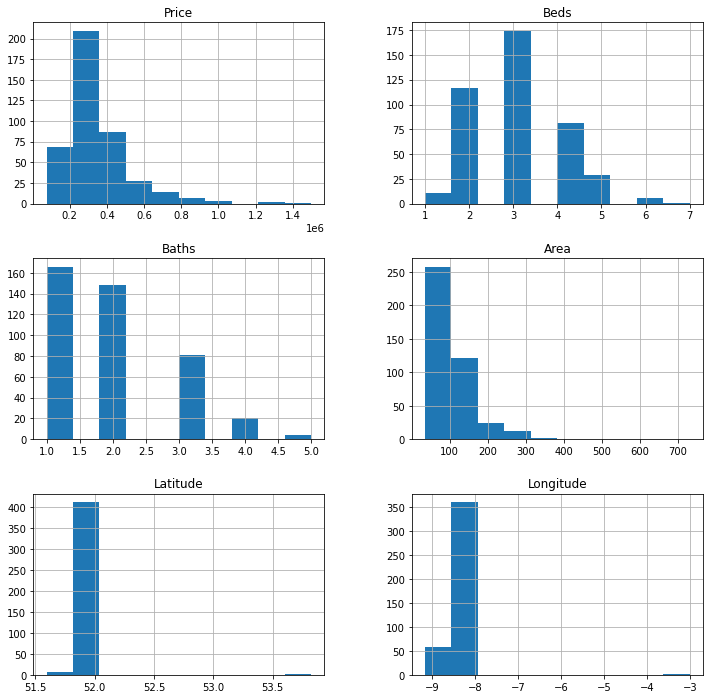

In [4]:
df.hist(figsize=(12,12))
plt.show()

##As seen: in these initial plots, the majority of houses are combined up to 3 beds and 2 baths. In general, 100m2 and bellow are more common. 

In [10]:
#Missing Data?
df.isnull().sum()

Address          0
Price            0
Beds             0
Baths            0
Area             0
Latitude         0
Longitude        0
geometry         0
found_address    0
city_area        0
link             0
dtype: int64

##Correlation Matrix.

In [5]:
#Correlation Matrix
corr = df.corr()
corr

Price      Beds     Baths      Area  Latitude  Longitude
Price      1.000000  0.587845  0.592316  0.779825 -0.045959  -0.020603
Beds       0.587845  1.000000  0.580627  0.699677 -0.060179  -0.071940
Baths      0.592316  0.580627  1.000000  0.589227  0.004829   0.002904
Area       0.779825  0.699677  0.589227  1.000000 -0.026443  -0.025542
Latitude  -0.045959 -0.060179  0.004829 -0.026443  1.000000   0.953449
Longitude -0.020603 -0.071940  0.002904 -0.025542  0.953449   1.000000

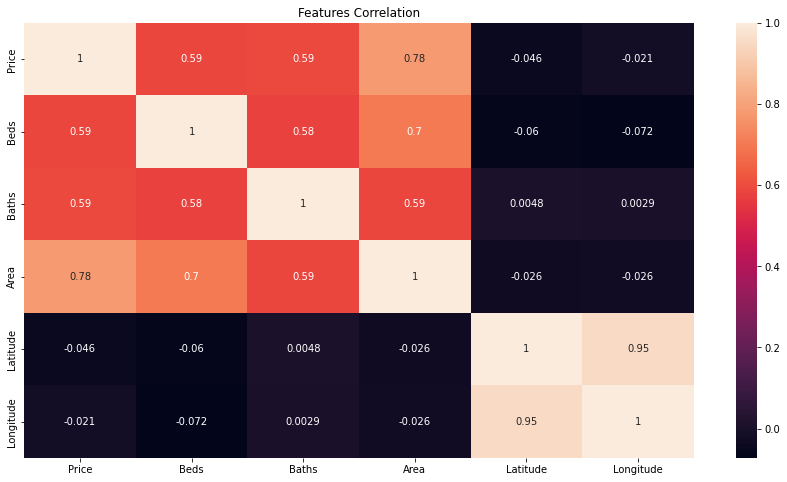

In [6]:
#Correlation Plot
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr, annot=True, ax=ax).set(title='Features Correlation');

##Not much to do here, Beds and Baths have small/medium correlation with price. Area seens more correlated

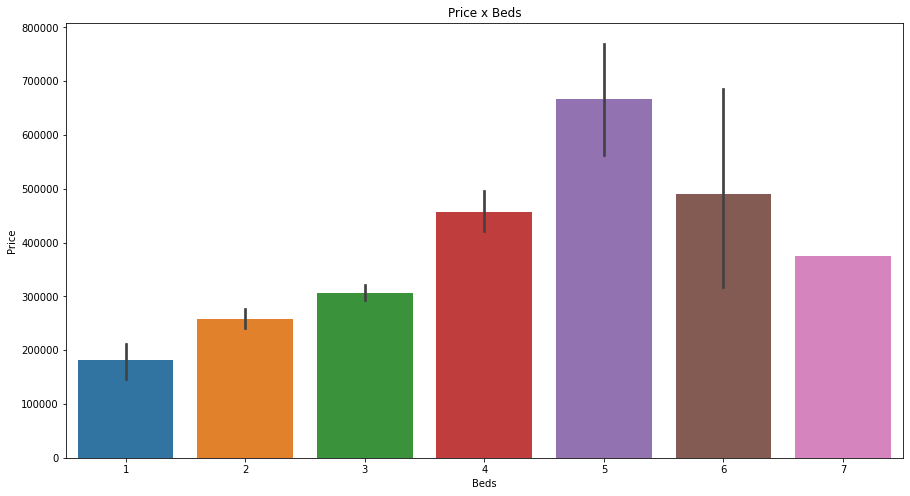

In [7]:
# Scatter Plots for Features
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=df['Beds'], y=df['Price'],ax=ax).set(title='Price x Beds');

###As the number of Beds increase in the locality, house prices goes up until 5 beds, then the effect reverses. This shows a weak positive correlation between these attributes.

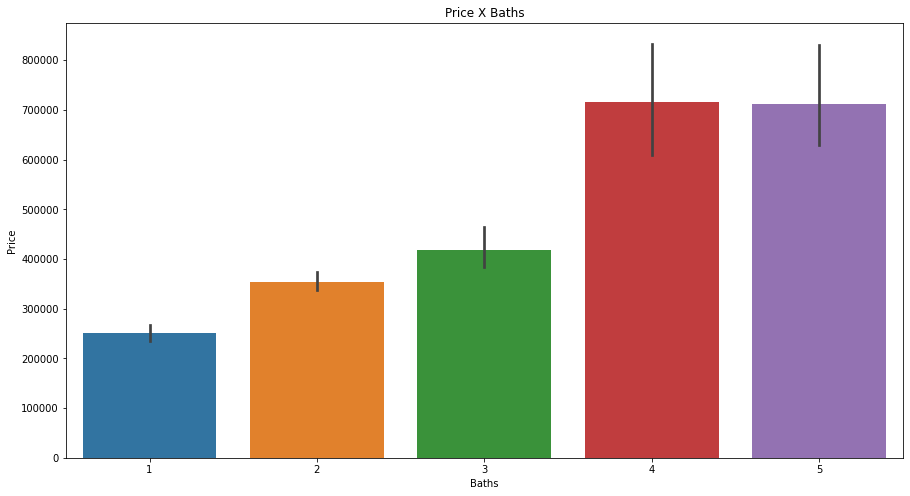

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=df['Baths'], y=df['Price'],ax=ax).set(title='Price X Baths');

###As the number of Baths increase in the locality, house prices goes up. This shows a better positive correlation between these attributes.

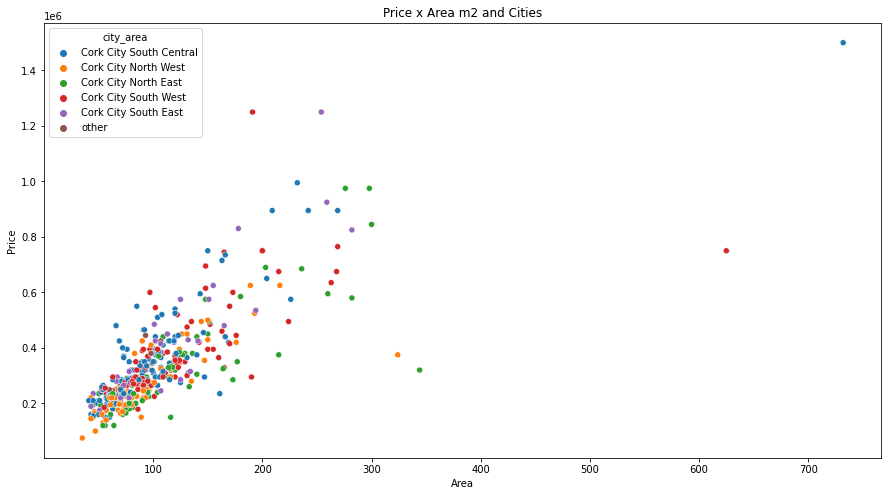

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=df['Area'], y=df['Price'],hue=df["city_area"],ax=ax).set(title='Price x Area m2 and Cities');

## With this multivariate plot it's possible to see a trend, the blue dots(Cork South Central) presents moderate and high prices even for smaller areas

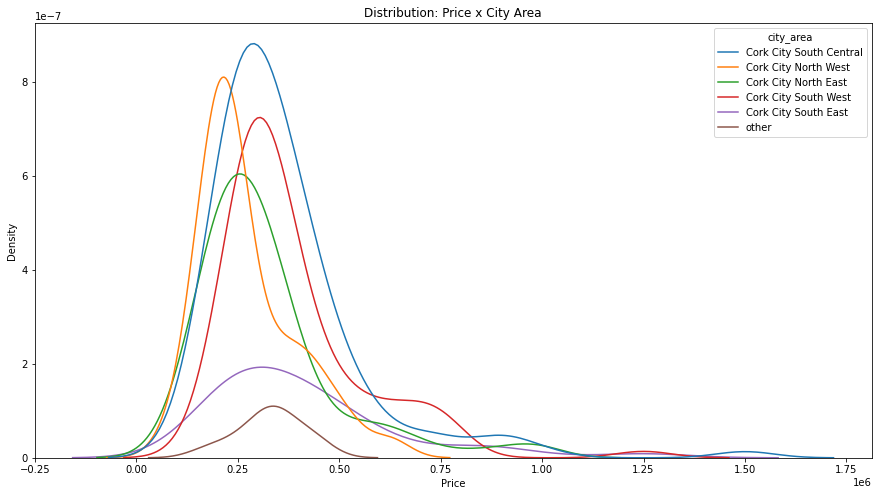

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.kdeplot(data=df, x="Price", hue="city_area").set(title="Distribution: Price x City Area");

[Text(0.5, 1.0, 'Distribution: Area x City Area')]

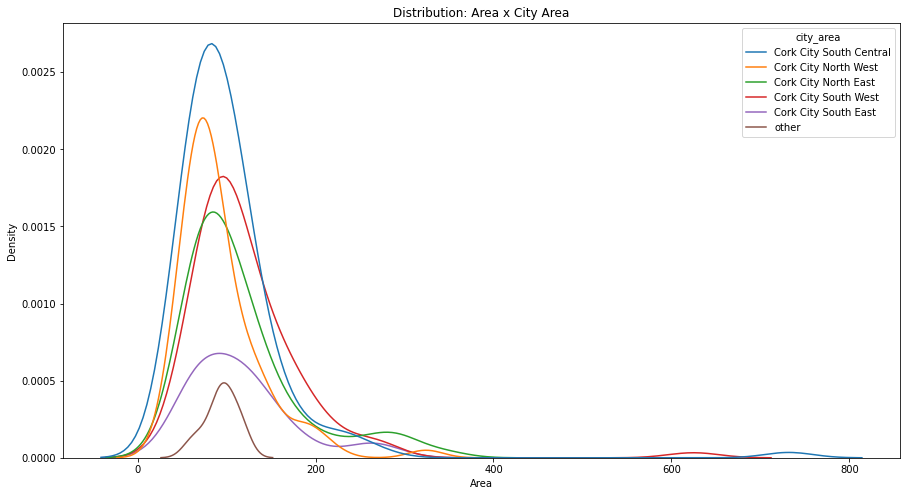

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.kdeplot(data=df, x="Area", hue="city_area").set(title="Distribution: Area x City Area")

##Above 2 different Distribution Plots, they are particularly useful to compare diferente groups, analizing the distribution, skewness, median, std, etc. 

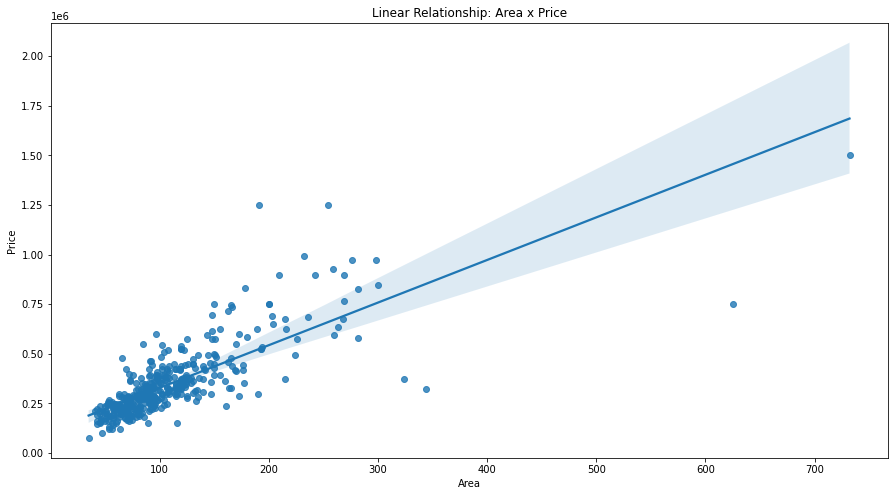

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['Area'], y=df['Price']).set(title="Linear Relationship: Area x Price");

##The trend line shows house price increasing with increase of house's areas.


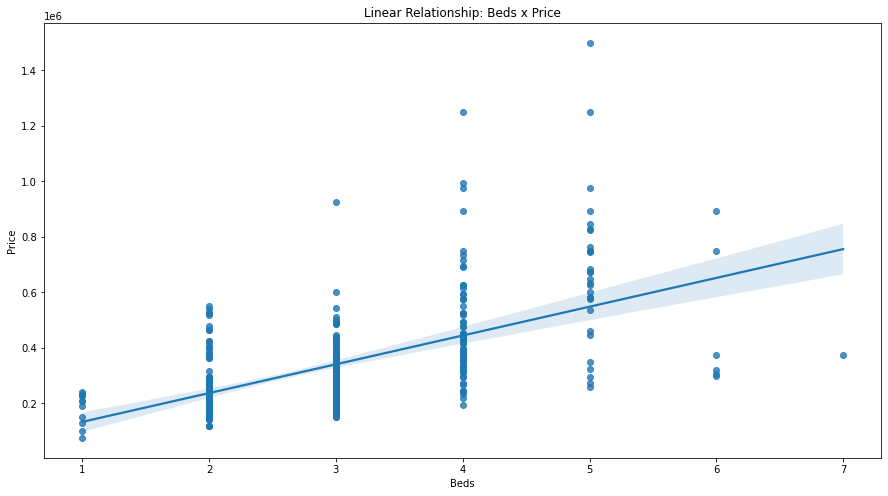

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['Beds'], y=df['Price']).set(title="Linear Relationship: Beds x Price");

##The trend line shows house price increasing with increase in Beds. Above 5 Beds the trend is missing. This finding may be very interesting, probably those observations corresponds to old houses or places far from Cork's Center.  

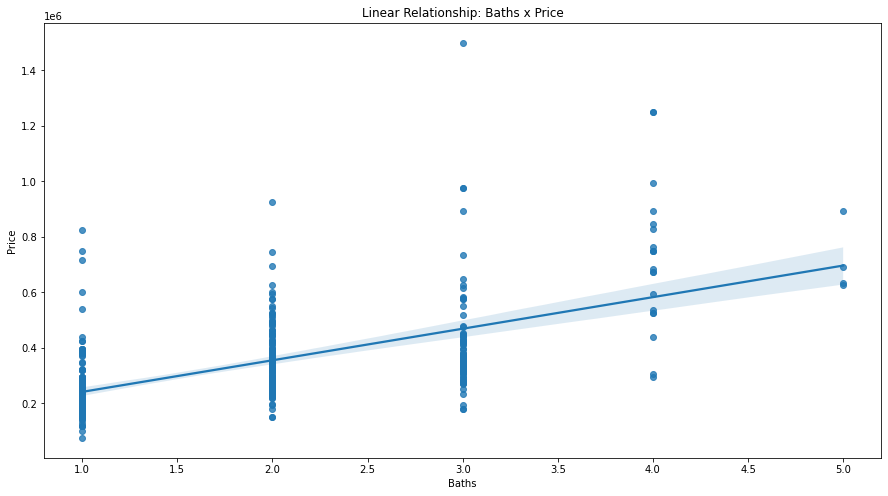

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['Baths'], y=df['Price']).set(title="Linear Relationship: Baths x Price");

##Another positive correlation, more baths, higher prices. After for the trend weakens.

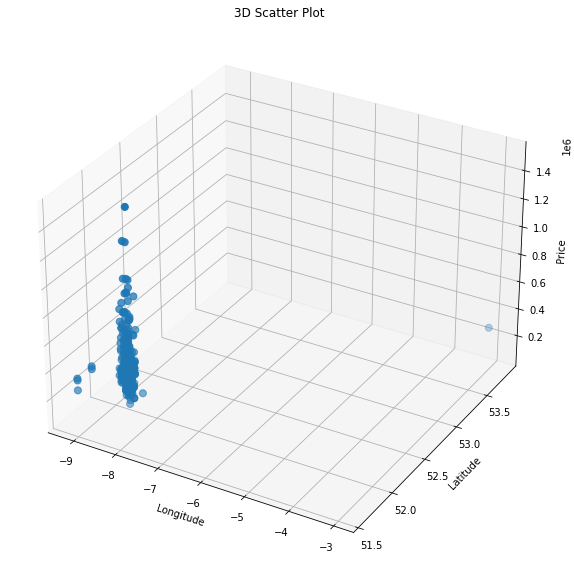

In [29]:
# Create a 3D scatter plot of latitude, longitude, and price
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Longitude'], df['Latitude'], df['Price'], s=50)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot')

plt.show()

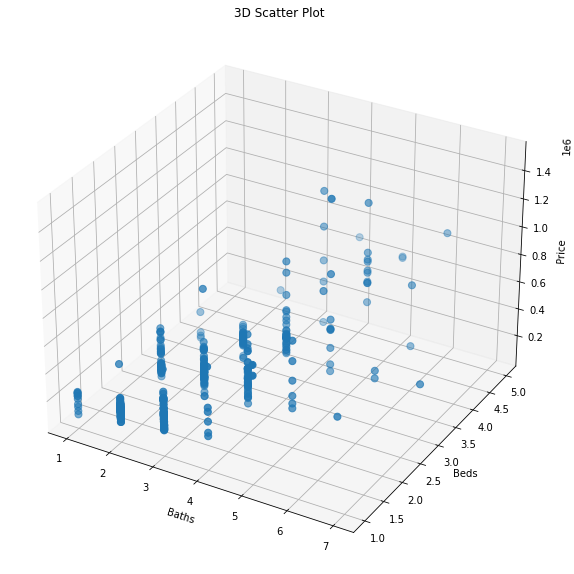

In [28]:
# Create a 3D scatter plot of latitude, longitude, and area
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Beds'], df['Baths'], df['Price'], s=50)

# Add labels and title
ax.set_xlabel('Baths')
ax.set_ylabel('Beds')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot')

plt.show()


### EDA FINDINGS 
1. Positive correlations beteween some Features, not much strong though.
2. Above 5 Beds prices drop abruptly, this may be due to houses placed far from city center of in bad condition. 
3. Houses in Cork - South Central have the most expensive m2. Higher prices in smaller areas


## Feature Engineering. To Improove the performance of the model we will create some agregations

## Average Price per City Area created  

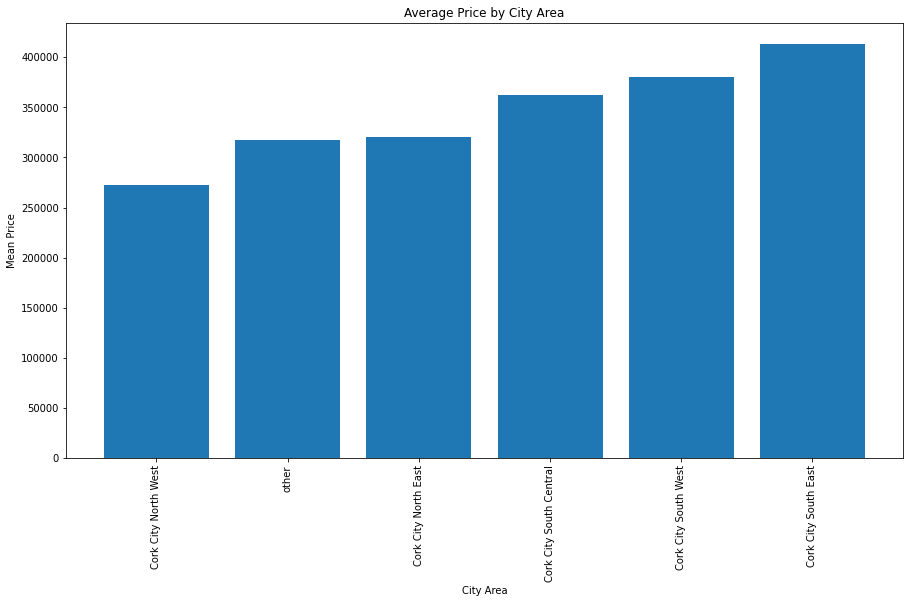

In [ ]:
# Calculate the average price by city area
mean_prices = df.groupby('city_area')['Price'].mean().sort_values()

# Create a bar plot of the mean prices by city area
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(mean_prices.index, mean_prices.values)
ax.set_xlabel('City Area')
ax.set_ylabel('Mean Price')
ax.set_title('Average Price by City Area')
plt.xticks(rotation=90)
plt.show()


##Average Price per m2

In [ ]:
# Calculate the price per square meter
df['Price per m2'] = df['Price'] / df['Area']

# Calculate the average price per square meter by city area
mean_price_m2 = df.groupby('city_area')['Price per m2'].mean().sort_values()

# Print the result
print(mean_price_m2)


city_area
Cork City North East       2885.689525
Cork City North West       3036.959219
Cork City South West       3324.015973
other                      3488.327726
Cork City South East       3618.156720
Cork City South Central    3729.569985
Name: Price per m2, dtype: float64


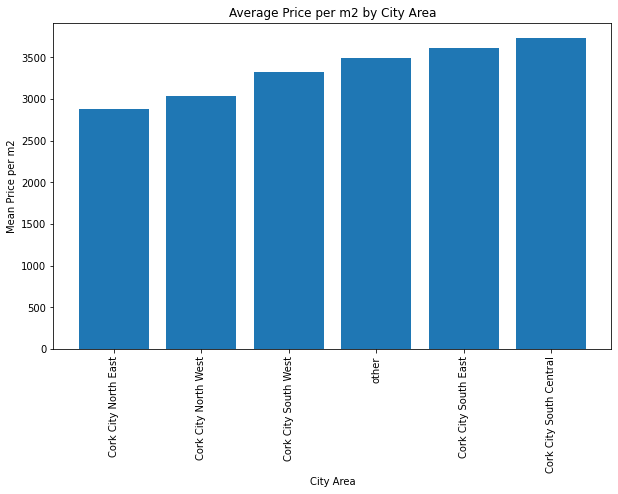

In [ ]:
# Create a bar plot of the mean price per square meter by city area
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mean_price_m2.index, mean_price_m2.values)
ax.set_xlabel('City Area')
ax.set_ylabel('Mean Price per m2')
ax.set_title('Average Price per m2 by City Area')
plt.xticks(rotation=90)
plt.show()


##Creating features: Price per m2, Mean Price per m2 by Area and Price per City Area

In [ ]:
# Calculate the price per square meter
df['Price per m2'] = df['Price'] / df['Area']

# Calculate the average price per square meter by city area
mean_price_m2 = df.groupby('city_area')['Price per m2'].mean()

# Calculate the average price by city area
average_price = df.groupby('city_area')['Price'].mean()

# Add the mean price per square meter and average price by city area as new columns to the DataFrame
df['Mean Price per m2'] = df['city_area'].map(mean_price_m2)
df['Average Price by City Area'] = df['city_area'].map(average_price)



In [ ]:
# Print the updated DataFrame
df.head()

Address   Price  Beds  Baths  \
0             42 Grattan Street, Cork City, Co. Cork  265000     4      2   
1  1 Old Friary Place, Shandon Street, Cork City,...  275000     2      2   
2   179 Kilnap Place, Farranree, Farranree, Co. Cork  225000     3      1   
3    23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork  580000     5      3   
4  14 Crestfield Mews, Riverstown, Glanmire, Co. ...  290000     3      1   

   Area  Latitude  Longitude                                       geometry  \
0   104  51.89882   -8.48012   POINT (-8.480119969919372 51.89882001927998)   
1    70  51.90248   -8.47808  POINT (-8.478079982324545 51.902480019211055)   
2    75  51.91443   -8.48010   POINT (-8.480100020989823 51.91443001474926)   
3   282  51.92694   -8.39931   POINT (-8.399309999999957 51.92694000000006)   
4    76  51.93510   -8.39284   POINT (-8.392839966524775 51.93509999752749)   

                                       found_address                city_area  \
0  MIDDLE PARISH COMMUNITY CENTRE, GRATTAN STREET...  Cork City South Central   
1  1, OLD FRIARY PLACE, SHANDON B, CORK, COUNTY C...     Cork City North West   
2  KILNAP PLACE, FARRANREE, FARRANFERRIS B, CORK,...     Cork City North West   
3  BARNAVARNA ROAD, RATHCOONEY, CORK, COUNTY CORK...     Cork City North East   
4  CRESTFIELD MEWS, RIVERSTOWN, CORK, COUNTY CORK...     Cork City North East   

                                                link  Price per m2  \
0  https://www.google.com/maps/@51.89882001927998...   2548.076923   
1  https://www.google.com/maps/@51.90248001921105...   3928.571429   
2  https://www.google.com/maps/@51.91443001474926...   3000.000000   
3  https://www.google.com/maps/@51.92694000000006...   2056.737589   
4  https://www.google.com/maps/@51.93509999752749...   3815.789474   

   Mean Price per m2  Average Price by City Area  
0        3729.569985               362643.442623  
1        3036.959219               272170.886076  
2        3036.959219               272170.886076  
3        2885.689525               320620.253165  
4        2885.689525               320620.253165

##Outlier Detection

In [ ]:
X = df[["Beds",	"Baths",	"Area","Price per m2", "Mean Price per m2", "Average Price by City Area"]]
y = df["Price"]

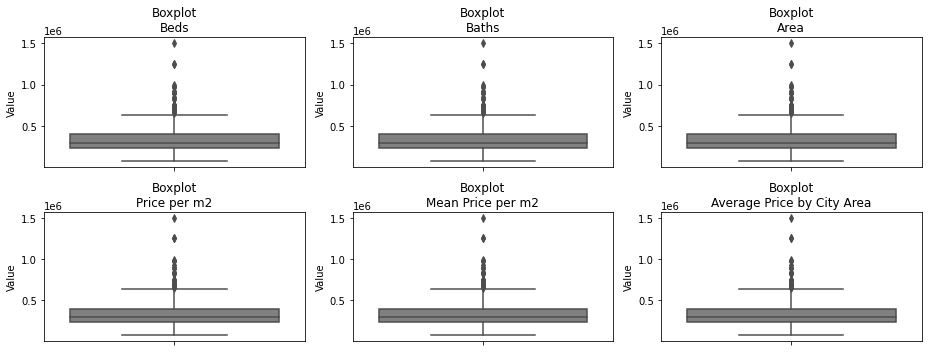

In [ ]:
plt.figure(figsize=(13,5))

for feat, grd in zip(X, range(231,237)):
  plt.subplot(grd)
  sns.boxplot(y=df["Price"], color='grey')
  plt.ylabel('Value')
  plt.title('Boxplot\n%s'%feat)
plt.tight_layout()

In [ ]:
# Calculate the IQR
Q1 = np.percentile(df["Price"], 25)
Q3 = np.percentile(df["Price"], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Filter out the outliers
df_clean = df[(df["Price"] > lower_bound) & (df["Price"] < upper_bound)]

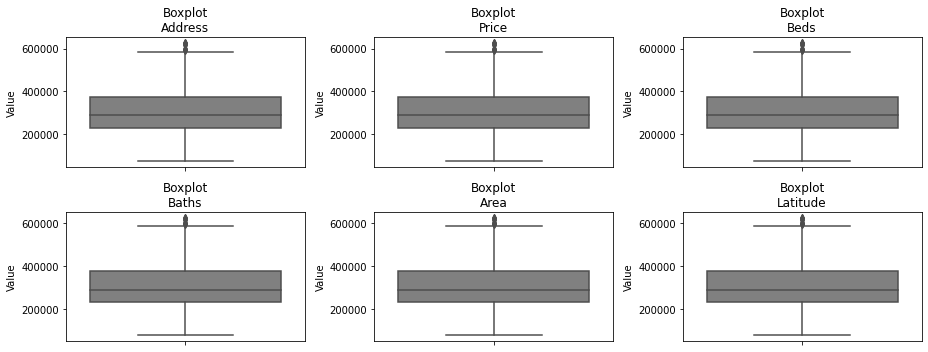

In [ ]:
plt.figure(figsize=(13,5))

for feat, grd in zip(df_clean, range(231,237)):
  plt.subplot(grd)
  sns.boxplot(y=df_clean["Price"], color='grey')
  plt.ylabel('Value')
  plt.title('Boxplot\n%s'%feat)
plt.tight_layout()

##Outliers Detected and Removed. Durig the modeling running multiple times the results without Outliers were always better, justifying the exclusion

In [ ]:
df

In [ ]:
X

Beds  Baths  Area  Price per m2  Mean Price per m2  \
0       4      2   104   2548.076923        3729.569985   
1       2      2    70   3928.571429        3036.959219   
2       3      1    75   3000.000000        3036.959219   
3       5      3   282   2056.737589        2885.689525   
4       3      1    76   3815.789474        2885.689525   
..    ...    ...   ...           ...                ...   
414     2      2    72   5555.555556        3729.569985   
415     4      2   134   2350.746269        3618.156720   
416     3      1    56   4553.571429        3324.015973   
417     2      2    92   5054.347826        3729.569985   
418     4      4   232   4288.793103        3729.569985   

     Average Price by City Area  
0                 362643.442623  
1                 272170.886076  
2                 272170.886076  
3                 320620.253165  
4                 320620.253165  
..                          ...  
414               362643.442623  
415               413500.000000  
416               380311.111111  
417               362643.442623  
418               362643.442623  

[419 rows x 6 columns]

In [ ]:
y

0      265000
1      275000
2      225000
3      580000
4      290000
        ...  
414    400000
415    315000
416    255000
417    465000
418    995000
Name: Price, Length: 419, dtype: int64

##Train and Test Split

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(335, 6) (84, 6)
(335,) (84,)


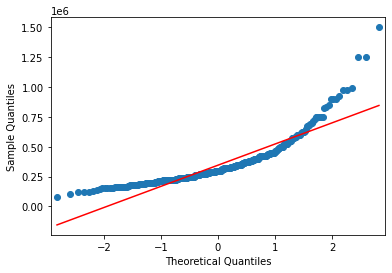

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(y,line='s')
plt.show()

##Although normality is not present in this case  we will proceed anyway,

In [ ]:
from scipy.stats import skew

print(skew(y))

2.3215505244967263


##With hight positive value, the feature is right skewed.

##Check Tranformations and its results in dataset


(335, 6)
(84, 6)


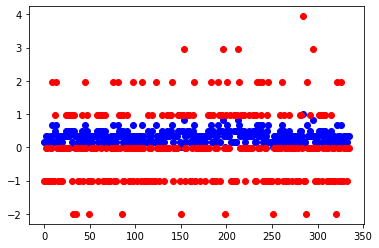

In [ ]:
# Scaling Data using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# Scaling Data using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Comparing Scaled Data

xx = np.arange(len(X_train_std))
yy1 = X_train_norm[:,0]
yy2 = X_train_std[:,0]
plt.scatter(xx,yy1,color='b')
plt.scatter(xx,yy2,color='r')

print(X_train_std.shape)
print(X_test_std.shape)

##Min-Max Scaler presents better results



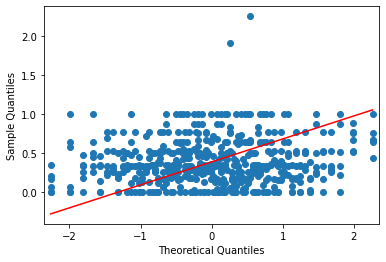

In [ ]:
qqplot(X_test_norm,line='s')
plt.show()

## Model - OLS regression analysis

In [ ]:
import statsmodels.api as sm
model_ols = sm.OLS(y_train, X_train_norm)
fitted = model_ols.fit()
print(fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              2094.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                   1.07e-258
Time:                        12:21:41   Log-Likelihood:                         -4163.9
No. Observations:                 335   AIC:                                      8340.
Df Residuals:                     329   BIC:                                      8363.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Make predictions on the test set
y_pred = fitted.predict(X_test_norm)

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 50133.26
Mean Squared Error: 15558366664.23
Root Mean Squared Error: 124733.18


##Implementing another regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm, y_train)

# Print the intercept and coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: -129267.28216713539
Coefficients: [ 21662.46970267  32388.10744395 862416.06391603 671735.05060649
  -6279.20675687  11941.06786216]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test_norm)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics summary
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 43312.26
Mean Squared Error: 13589416172.05
Root Mean Squared Error: 116573.65


##Residual Tests

Distribution is not normal. Statistic: 0.754, p-value: 5.235e-22


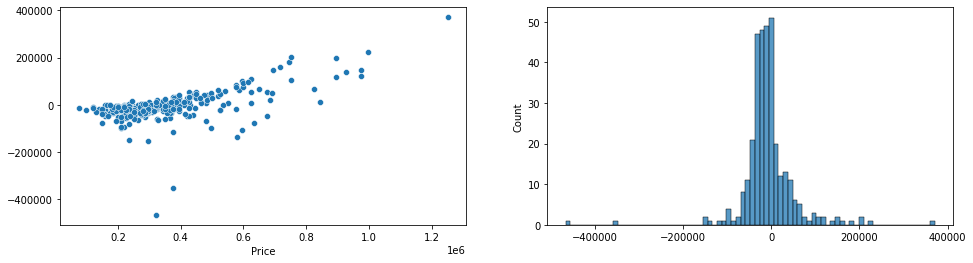

In [ ]:
from scipy.stats import shapiro
fig, ax = plt.subplots(figsize=(16,4), ncols=2)
ax[0] = sns.scatterplot(x=y_train, y=fitted.resid, ax=ax[0])
ax[1] = sns.histplot(fitted.resid, ax=ax[1])

statistic, p_value = shapiro(fitted.resid)
if p_value>0.05:
    print("Distribution is normal. Statistic: {0:.3}, p-value: {1:.4}".format(statistic, p_value))
else:
    print("Distribution is not normal. Statistic: {0:.3}, p-value: {1:.4}".format(statistic, p_value))

## Testing a different Model to compare to Baseline

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as knn
model4 = knn(n_neighbors=3,p=1,algorithm='brute')
model4.fit(X_train_norm,y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=3, p=1)

In [ ]:
ypred3 = model4.predict(X_test_norm)
ypred3

array([133333.33333333, 216666.66666667, 288333.33333333, 373333.33333333,
       253333.33333333, 333333.33333333, 328333.33333333, 220000.        ,
       396666.66666667, 345000.        , 269833.33333333, 273333.33333333,
       238333.33333333, 178333.33333333, 318333.33333333, 356666.66666667,
       345000.        , 351666.66666667, 211666.66666667, 501666.66666667,
       260000.        , 226666.66666667, 336666.66666667, 250000.        ,
       371666.66666667, 323333.33333333, 283333.33333333, 241666.66666667,
       586666.66666667, 293333.33333333, 313333.33333333, 325000.        ,
       223333.33333333, 268333.33333333, 293333.33333333, 755000.        ,
       371666.66666667, 438333.33333333, 195000.        , 700000.        ,
       345000.        , 306666.66666667, 319666.66666667, 223333.33333333,
       268333.33333333, 253333.33333333, 550000.        , 218333.33333333,
       238166.66666667, 430000.        , 661666.66666667, 250000.        ,
       220000.        , 1

In [ ]:
model4.score(X_test_norm,y_test)

0.6253762971193069

In [ ]:
k_values = np.arange(1,100,2)

In [ ]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model2 = knn(n_neighbors=k,p=1)
    model2.fit(X_train_norm,y_train)
    
    train_score = model2.score(X_train_norm, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model2.score(X_test_norm, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=60.57%
k=3, train_accuracy=90.82%, test_accuracy=62.54%
k=5, train_accuracy=83.38%, test_accuracy=65.67%
k=7, train_accuracy=77.85%, test_accuracy=62.62%
k=9, train_accuracy=72.56%, test_accuracy=58.30%
k=11, train_accuracy=70.00%, test_accuracy=55.62%
k=13, train_accuracy=67.07%, test_accuracy=53.73%
k=15, train_accuracy=64.46%, test_accuracy=53.80%
k=17, train_accuracy=62.21%, test_accuracy=52.89%
k=19, train_accuracy=61.50%, test_accuracy=50.33%
k=21, train_accuracy=59.69%, test_accuracy=48.89%
k=23, train_accuracy=57.65%, test_accuracy=47.44%
k=25, train_accuracy=56.71%, test_accuracy=46.65%
k=27, train_accuracy=55.55%, test_accuracy=46.09%
k=29, train_accuracy=54.61%, test_accuracy=44.78%
k=31, train_accuracy=53.84%, test_accuracy=43.82%
k=33, train_accuracy=53.36%, test_accuracy=43.27%
k=35, train_accuracy=51.99%, test_accuracy=43.00%
k=37, train_accuracy=50.96%, test_accuracy=41.82%
k=39, train_accuracy=50.34%, test_accuracy=41.05%
k=41

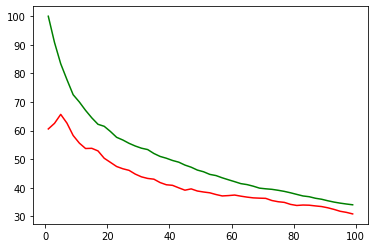

In [ ]:
plt.plot(k_values,train_score_arr,'g')
plt.plot(k_values,val_score_arr,'r')

##No Clear Advantages in KNN

##Cross Fold Validation

In [ ]:
from sklearn.model_selection import cross_val_score 
cross_val_score_test = cross_val_score(model, X_test_std, y_test, cv=10, scoring="r2")
print(cross_val_score_test)

[ 0.85315691  0.75576791  0.73449877  0.87061766  0.94953047 -0.19671451
  0.85342171  0.59283364  0.87828078  0.84505783]


In [ ]:
cross_val_score_test.mean()

0.713645117564983

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, ypred3))

0.6253762971193069


##Not a fabulous results but enough for this stage

In [ ]:
c = pd.DataFrame(ypred3, columns=['Estimated Price'])
c.head()

Estimated Price
0    133333.333333
1    216666.666667
2    288333.333333
3    373333.333333
4    253333.333333

In [ ]:
d = pd.DataFrame(y_test)
d = y_test.reset_index(drop=True)
d.head()

0    120000
1    240000
2    350000
3    425000
4    290000
Name: Price, dtype: int64

##Table Predict vs Observed

In [ ]:
ynew = pd.concat([c,d], axis=1)
ynew

Estimated Price    Price
0     133333.333333   120000
1     216666.666667   240000
2     288333.333333   350000
3     373333.333333   425000
4     253333.333333   290000
..              ...      ...
79    393333.333333   350000
80    336666.666667   355000
81    326666.666667   425000
82    700000.000000  1250000
83    740000.000000   895000

[84 rows x 2 columns]

In [ ]:
model.intercept_

-129267.28216713539

In [ ]:
predict = model.predict([[21662.46970267,  32388.10744395, 862416.06391603, 671735.05060649,
        -6279.20675687,  11941.06786216]])

predict


array([1.19668959e+12])

In [ ]:
X

Beds  Baths  Area  Price per m2  Mean Price per m2  \
0       4      2   104   2548.076923        3729.569985   
1       2      2    70   3928.571429        3036.959219   
2       3      1    75   3000.000000        3036.959219   
3       5      3   282   2056.737589        2885.689525   
4       3      1    76   3815.789474        2885.689525   
..    ...    ...   ...           ...                ...   
414     2      2    72   5555.555556        3729.569985   
415     4      2   134   2350.746269        3618.156720   
416     3      1    56   4553.571429        3324.015973   
417     2      2    92   5054.347826        3729.569985   
418     4      4   232   4288.793103        3729.569985   

     Average Price by City Area  
0                 362643.442623  
1                 272170.886076  
2                 272170.886076  
3                 320620.253165  
4                 320620.253165  
..                          ...  
414               362643.442623  
415               413500.000000  
416               380311.111111  
417               362643.442623  
418               362643.442623  

[419 rows x 6 columns]

##Save the Model with Pickle to Deploy. 
Ref:https://betterprogramming.pub/pickling-machine-learning-models-aeb474bc2d78

In [ ]:
joblib.dump(model, 'model_lr_real_estate.pkl')

['model_lr_real_estate.pkl']

In [ ]:
from io import BytesIO
import requests
mLink = 'https://github.com/orlandojrps/stream/blob/main/model_lr_real_estate.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)

model = joblib.load(mfile)

print(model)

LinearRegression()


In [ ]:
# Load the pre-trained linear regression model
lr_model = joblib.load(mfile)
 

##Some values inputed manually for testing the model. It works! Our model is working and ready to move to a Streamlib Web server.

In [ ]:
# Define the function to make a prediction
def predict(features):
    prediction = lr_model.predict(features)
    return prediction[0]
    
arr = np.array(	[1,4,	600,	2548.076923,	580555.569985,	362643.442623]).reshape(1, -1)

prediction = predict(	arr)

#c2.write('Your Suggested Price is:', 12)  
print(prediction)

2914025667.1288815


# FROM THIS POINT JUST SOME EXPERIMENTS. 

In [ ]:
!pip install numpy pandas geopandas matplotlib tilemapbase seaborn shapely requests rtree

In [35]:
!apt-get install -qq curl g++ make

In [36]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   987k      0 --:--:-- --:--:-- --:--:--  986k


In [37]:
%cd spatialindex-src-1.8.5

/content/spatialindex-src-1.8.5


In [ ]:
!./configure; make; make install

In [39]:
!ldconfig

In [ ]:
!pip install numpy pandas geopandas matplotlib tilemapbase seaborn shapely requests rtree

In [41]:
import numpy as np 
import pandas as pd
import geopandas as gpd 
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.path import Path
from matplotlib.textpath import TextToPath
import tilemapbase
import warnings
import matplotlib.cbook
import requests

import seaborn as sns
import shapely.speedups
shapely.speedups.enable()

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


## Loading and preprocessing the data from Ireland
Create a new folder, change into the folder and download the data with wget:

In [42]:
%cd /content
!mkdir amsterdam_data
%cd amsterdam_data
!wget http://download.geofabrik.de/europe/ireland-and-northern-ireland-latest-free.shp.zip

/content
/content/amsterdam_data
--2023-03-06 20:49:59--  http://download.geofabrik.de/europe/ireland-and-northern-ireland-latest-free.shp.zip
Resolving download.geofabrik.de (download.geofabrik.de)... 65.109.48.72, 65.109.50.43
Connecting to download.geofabrik.de (download.geofabrik.de)|65.109.48.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 606578123 (578M) [application/zip]
Saving to: ‘ireland-and-northern-ireland-latest-free.shp.zip’

ireland-and-norther 100%[===================>] 578.48M  22.1MB/s    in 26s     

2023-03-06 20:50:25 (22.4 MB/s) - ‘ireland-and-northern-ireland-latest-free.shp.zip’ saved [606578123/606578123]



###Unzip the files and load the points as a GeoDataFrame:


In [44]:
!unzip "/content/amsterdam_data/ireland-and-northern-ireland-latest-free.shp.zip" 

Archive:  /content/amsterdam_data/ireland-and-northern-ireland-latest-free.shp.zip
  inflating: README                  
 extracting: gis_osm_buildings_a_free_1.cpg  
  inflating: gis_osm_buildings_a_free_1.dbf  
  inflating: gis_osm_buildings_a_free_1.prj  
  inflating: gis_osm_buildings_a_free_1.shp  
  inflating: gis_osm_buildings_a_free_1.shx  
 extracting: gis_osm_landuse_a_free_1.cpg  
  inflating: gis_osm_landuse_a_free_1.dbf  
  inflating: gis_osm_landuse_a_free_1.prj  
  inflating: gis_osm_landuse_a_free_1.shp  
  inflating: gis_osm_landuse_a_free_1.shx  
 extracting: gis_osm_natural_a_free_1.cpg  
  inflating: gis_osm_natural_a_free_1.dbf  
  inflating: gis_osm_natural_a_free_1.prj  
  inflating: gis_osm_natural_a_free_1.shp  
  inflating: gis_osm_natural_a_free_1.shx  
 extracting: gis_osm_natural_free_1.cpg  
  inflating: gis_osm_natural_free_1.dbf  
  inflating: gis_osm_natural_free_1.prj  
  inflating: gis_osm_natural_free_1.shp  
  inflating: gis_osm_natural_free_1.shx  

##Load Geodata from Cork

###then folder is Amsterdan but files are from Cork

In [50]:
points = gpd.read_file("/content/amsterdam_data/gis_osm_pois_free_1.shp")
p2=gpd.read_file("/content/amsterdam_data/gis_osm_pois_free_1.shp")

##Load the shapefile for the city 


In [47]:
city = gpd.read_file("https://raw.githubusercontent.com/orlandojrps/stream/main/cork-city-boundary.geojson")


In [49]:
city

Latitude          Longtitude            ENGLISH    CONTAE COUNTY  \
0  51.905327668502935  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   

                 AREA PROVINCE  \
0  186597605.50694406  Munster   

                                            geometry  
0  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...

In [51]:
points = points.to_crs({"init": "EPSG:4326"})

In [52]:
p2

osm_id  code               fclass  \
0           443197  2511          convenience   
1           659799  2907  camera_surveillance   
2         21907676  2255          golf_course   
3         27465846  2253        swimming_pool   
4         27474191  2007              library   
...            ...   ...                  ...   
61384  10712835289  2701         tourist_info   
61385  10712835290  2701         tourist_info   
61386  10712835291  2701         tourist_info   
61387  10712835292  2701         tourist_info   
61388  10712835302  2701         tourist_info   

                                      name                   geometry  
0                                   Centra  POINT (-7.92899 53.42201)  
1                                      NaN  POINT (-6.25076 53.34117)  
2                                      NaN  POINT (-7.61598 54.33857)  
3      Aquazone at National Aquatic Centre  POINT (-6.37011 53.39705)  
4                   Blanchardstown Library  POINT (-6.39116 53.39073)  
...                                    ...                        ...  
61384                                  NaN  POINT (-7.36799 52.40912)  
61385                                  NaN  POINT (-7.36809 52.40999)  
61386                                  NaN  POINT (-7.36778 52.41035)  
61387                                  NaN  POINT (-7.36785 52.41097)  
61388                                  NaN  POINT (-7.36702 52.41201)  

[61389 rows x 5 columns]

In [53]:
p2.fclass.unique()

array(['convenience', 'camera_surveillance', 'golf_course',
       'swimming_pool', 'library', 'theatre', 'attraction', 'restaurant',
       'telephone', 'pitch', 'viewpoint', 'recycling_glass',
       'post_office', 'water_tower', 'cinema', 'post_box', 'atm', 'pub',
       'vending_parking', 'jeweller', 'fast_food', 'hotel', 'supermarket',
       'museum', 'pharmacy', 'doityourself', 'police', 'nursing_home',
       'waste_basket', 'chemist', 'bank', 'kindergarten', 'park',
       'toilet', 'windmill', 'sports_centre', 'artwork', 'school',
       'courthouse', 'tourist_info', 'ruins', 'monument', 'bicycle_shop',
       'clothes', 'embassy', 'community_centre', 'laundry',
       'garden_centre', 'kiosk', 'bench', 'picnic_site', 'recycling',
       'butcher', 'wayside_cross', 'cafe', 'fountain', 'hostel',
       'gift_shop', 'lighthouse', 'drinking_water', 'nightclub',
       'guesthouse', 'arts_centre', 'bar', 'car_rental', 'university',
       'veterinary', 'doctors', 'archaeological'

In [ ]:
points.fclass.unique()


##Filter the data for restaurants (or any other POI category):




In [54]:
pointsbkp=points.copy()

In [58]:
p3 = points.copy()
p3 = p3.to_crs("EPSG:3857")
p3[p3['fclass']=="police"]

osm_id  code  fclass                       name  \
98       243783190  2001  police  Ballyfermot Garda Station   
178      256426085  2001  police      Clonmel Garda Station   
381      279176716  2001  police      Roxboro Garda Station   
383      279211639  2001  police     Crusheen Garda Station   
485      286595177  2001  police       Arklow Garda Station   
...            ...   ...     ...                        ...   
56635   9963872975  2001  police    Newmarket Garda Station   
56943   9995558063  2001  police      Cloghan Garda Station   
58108  10114485350  2001  police    Eyrecourt Garda Station   
59867  10557119887  2001  police    Freshford Garda Station   
61253  10703924648  2001  police    Castlerea Garda Station   

                               geometry  
98      POINT (-707768.454 7047019.678)  
178     POINT (-857151.207 6864407.557)  
381     POINT (-959019.495 6918656.896)  
383     POINT (-990595.424 6971625.005)  
485     POINT (-685106.177 6945428.485)  
...                                 ...  
56635  POINT (-1001532.030 6839025.701)  
56943   POINT (-876922.484 7024697.813)  
58108   POINT (-905292.812 7019969.746)  
59867   POINT (-823122.631 6933661.713)  
61253   POINT (-944482.527 7126086.936)  

[134 rows x 5 columns]

In [59]:
p3['tmp'], city['tmp'] = 1, 1


In [60]:
df = pd.merge(p3, city, on='tmp', how='inner').drop(columns='tmp')

In [61]:
df[df.fclass=="police"]


osm_id  code  fclass                       name  \
98       243783190  2001  police  Ballyfermot Garda Station   
178      256426085  2001  police      Clonmel Garda Station   
381      279176716  2001  police      Roxboro Garda Station   
383      279211639  2001  police     Crusheen Garda Station   
485      286595177  2001  police       Arklow Garda Station   
...            ...   ...     ...                        ...   
56635   9963872975  2001  police    Newmarket Garda Station   
56943   9995558063  2001  police      Cloghan Garda Station   
58108  10114485350  2001  police    Eyrecourt Garda Station   
59867  10557119887  2001  police    Freshford Garda Station   
61253  10703924648  2001  police    Castlerea Garda Station   

                             geometry_x            Latitude  \
98      POINT (-707768.454 7047019.678)  51.905327668502935   
178     POINT (-857151.207 6864407.557)  51.905327668502935   
381     POINT (-959019.495 6918656.896)  51.905327668502935   
383     POINT (-990595.424 6971625.005)  51.905327668502935   
485     POINT (-685106.177 6945428.485)  51.905327668502935   
...                                 ...                 ...   
56635  POINT (-1001532.030 6839025.701)  51.905327668502935   
56943   POINT (-876922.484 7024697.813)  51.905327668502935   
58108   POINT (-905292.812 7019969.746)  51.905327668502935   
59867   POINT (-823122.631 6933661.713)  51.905327668502935   
61253   POINT (-944482.527 7126086.936)  51.905327668502935   

               Longtitude            ENGLISH    CONTAE COUNTY  \
98     -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
178    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
381    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
383    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
485    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
...                   ...                ...       ...    ...   
56635  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
56943  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
58108  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
59867  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
61253  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   

                     AREA PROVINCE  \
98     186597605.50694406  Munster   
178    186597605.50694406  Munster   
381    186597605.50694406  Munster   
383    186597605.50694406  Munster   
485    186597605.50694406  Munster   
...                   ...      ...   
56635  186597605.50694406  Munster   
56943  186597605.50694406  Munster   
58108  186597605.50694406  Munster   
59867  186597605.50694406  Munster   
61253  186597605.50694406  Munster   

                                              geometry_y  
98     POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
178    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
381    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
383    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
485    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
...                                                  ...  
56635  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
56943  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
58108  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
59867  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
61253  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  

[134 rows x 13 columns]

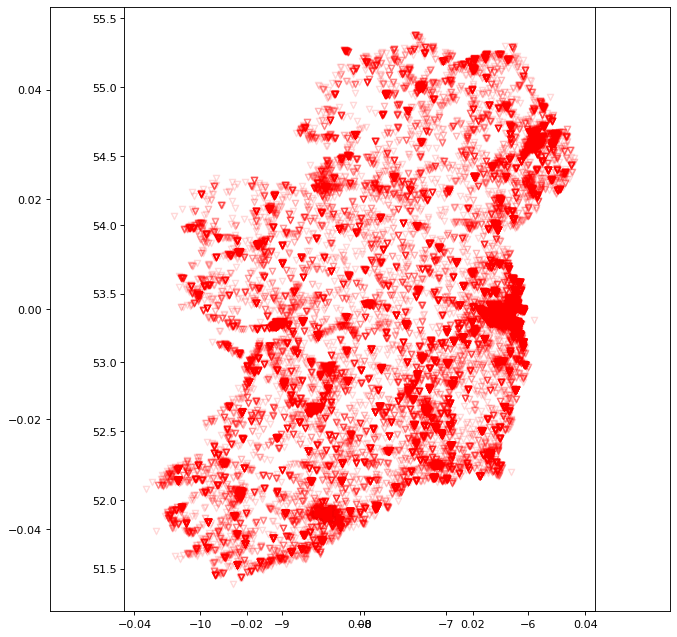

In [64]:
# edit the figure size however you need to
plt.figure(num=None, figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
# create plot and axes
fig = plt.plot()
ax1 = plt.axes()
# these values can be changed as needed, the markers are LaTeX symbols
city.plot(ax=ax1, alpha=0.1, edgecolor="black", facecolor="white")
points.plot(ax=ax1, alpha = 0.1, color="red", marker='$\\bigtriangledown$',)
ax1.figure.savefig('/content/amsterdam_data/plot1.png', bbox_inches='tight')

## Add a background map to the plot


Load the background map using tilemapbase:

In [66]:
from geopandas import GeoDataFrame
gdf = GeoDataFrame(points, geometry=points.geometry)
gdf.set_crs(epsg=4326, inplace=True,allow_override=True)


osm_id  code               fclass  \
0           443197  2511          convenience   
1           659799  2907  camera_surveillance   
2         21907676  2255          golf_course   
3         27465846  2253        swimming_pool   
4         27474191  2007              library   
...            ...   ...                  ...   
61384  10712835289  2701         tourist_info   
61385  10712835290  2701         tourist_info   
61386  10712835291  2701         tourist_info   
61387  10712835292  2701         tourist_info   
61388  10712835302  2701         tourist_info   

                                      name                   geometry  
0                                   Centra  POINT (-7.92899 53.42201)  
1                                      NaN  POINT (-6.25076 53.34117)  
2                                      NaN  POINT (-7.61598 54.33857)  
3      Aquazone at National Aquatic Centre  POINT (-6.37011 53.39705)  
4                   Blanchardstown Library  POINT (-6.39116 53.39073)  
...                                    ...                        ...  
61384                                  NaN  POINT (-7.36799 52.40912)  
61385                                  NaN  POINT (-7.36809 52.40999)  
61386                                  NaN  POINT (-7.36778 52.41035)  
61387                                  NaN  POINT (-7.36785 52.41097)  
61388                                  NaN  POINT (-7.36702 52.41201)  

[61389 rows x 5 columns]

In [67]:
p3 = p3.to_crs("EPSG:3857")#importante
city = city.to_crs("EPSG:3857")#importante

In [68]:
tilemapbase.start_logging()
tilemapbase.init(create=True)
extent = tilemapbase.extent_from_frame(city, buffer = 25)

In [69]:
extent

Extent((-969429.7340171158,6807510.430036527)->(-922220.5893273839,6756239.91206337) projected as epsg:3857)

INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/974/676.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/974/677.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/974/678.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/975/676.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/975/677.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/975/678.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/976/676.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/976/677.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/11/976/678.png


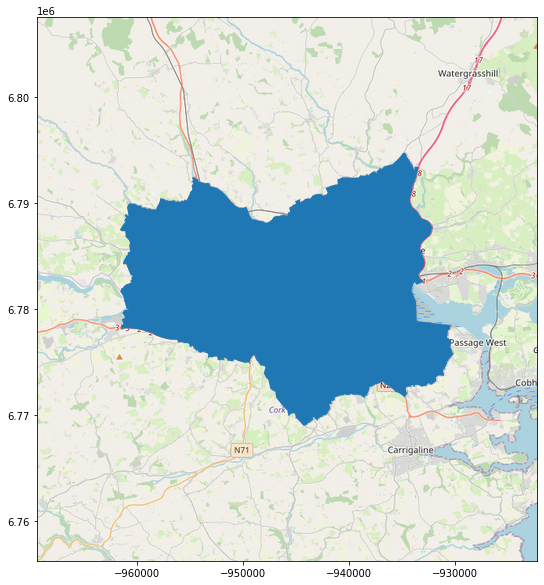

In [70]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=400)
plotter.plot(ax)
city.plot(ax=ax, column="COUNTY")
#ax.legend(frame.name)
None

In [71]:
points

osm_id  code               fclass  \
0           443197  2511          convenience   
1           659799  2907  camera_surveillance   
2         21907676  2255          golf_course   
3         27465846  2253        swimming_pool   
4         27474191  2007              library   
...            ...   ...                  ...   
61384  10712835289  2701         tourist_info   
61385  10712835290  2701         tourist_info   
61386  10712835291  2701         tourist_info   
61387  10712835292  2701         tourist_info   
61388  10712835302  2701         tourist_info   

                                      name                   geometry  
0                                   Centra  POINT (-7.92899 53.42201)  
1                                      NaN  POINT (-6.25076 53.34117)  
2                                      NaN  POINT (-7.61598 54.33857)  
3      Aquazone at National Aquatic Centre  POINT (-6.37011 53.39705)  
4                   Blanchardstown Library  POINT (-6.39116 53.39073)  
...                                    ...                        ...  
61384                                  NaN  POINT (-7.36799 52.40912)  
61385                                  NaN  POINT (-7.36809 52.40999)  
61386                                  NaN  POINT (-7.36778 52.41035)  
61387                                  NaN  POINT (-7.36785 52.41097)  
61388                                  NaN  POINT (-7.36702 52.41201)  

[61389 rows x 5 columns]

In [72]:
df[df['fclass']=="police"]

osm_id  code  fclass                       name  \
98       243783190  2001  police  Ballyfermot Garda Station   
178      256426085  2001  police      Clonmel Garda Station   
381      279176716  2001  police      Roxboro Garda Station   
383      279211639  2001  police     Crusheen Garda Station   
485      286595177  2001  police       Arklow Garda Station   
...            ...   ...     ...                        ...   
56635   9963872975  2001  police    Newmarket Garda Station   
56943   9995558063  2001  police      Cloghan Garda Station   
58108  10114485350  2001  police    Eyrecourt Garda Station   
59867  10557119887  2001  police    Freshford Garda Station   
61253  10703924648  2001  police    Castlerea Garda Station   

                             geometry_x            Latitude  \
98      POINT (-707768.454 7047019.678)  51.905327668502935   
178     POINT (-857151.207 6864407.557)  51.905327668502935   
381     POINT (-959019.495 6918656.896)  51.905327668502935   
383     POINT (-990595.424 6971625.005)  51.905327668502935   
485     POINT (-685106.177 6945428.485)  51.905327668502935   
...                                 ...                 ...   
56635  POINT (-1001532.030 6839025.701)  51.905327668502935   
56943   POINT (-876922.484 7024697.813)  51.905327668502935   
58108   POINT (-905292.812 7019969.746)  51.905327668502935   
59867   POINT (-823122.631 6933661.713)  51.905327668502935   
61253   POINT (-944482.527 7126086.936)  51.905327668502935   

               Longtitude            ENGLISH    CONTAE COUNTY  \
98     -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
178    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
381    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
383    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
485    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
...                   ...                ...       ...    ...   
56635  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
56943  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
58108  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
59867  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
61253  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   

                     AREA PROVINCE  \
98     186597605.50694406  Munster   
178    186597605.50694406  Munster   
381    186597605.50694406  Munster   
383    186597605.50694406  Munster   
485    186597605.50694406  Munster   
...                   ...      ...   
56635  186597605.50694406  Munster   
56943  186597605.50694406  Munster   
58108  186597605.50694406  Munster   
59867  186597605.50694406  Munster   
61253  186597605.50694406  Munster   

                                              geometry_y  
98     POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
178    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
381    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
383    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
485    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
...                                                  ...  
56635  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
56943  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
58108  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
59867  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
61253  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  

[134 rows x 13 columns]

In [73]:
points

osm_id  code               fclass  \
0           443197  2511          convenience   
1           659799  2907  camera_surveillance   
2         21907676  2255          golf_course   
3         27465846  2253        swimming_pool   
4         27474191  2007              library   
...            ...   ...                  ...   
61384  10712835289  2701         tourist_info   
61385  10712835290  2701         tourist_info   
61386  10712835291  2701         tourist_info   
61387  10712835292  2701         tourist_info   
61388  10712835302  2701         tourist_info   

                                      name                   geometry  
0                                   Centra  POINT (-7.92899 53.42201)  
1                                      NaN  POINT (-6.25076 53.34117)  
2                                      NaN  POINT (-7.61598 54.33857)  
3      Aquazone at National Aquatic Centre  POINT (-6.37011 53.39705)  
4                   Blanchardstown Library  POINT (-6.39116 53.39073)  
...                                    ...                        ...  
61384                                  NaN  POINT (-7.36799 52.40912)  
61385                                  NaN  POINT (-7.36809 52.40999)  
61386                                  NaN  POINT (-7.36778 52.41035)  
61387                                  NaN  POINT (-7.36785 52.41097)  
61388                                  NaN  POINT (-7.36702 52.41201)  

[61389 rows x 5 columns]

In [74]:
df.rename(columns={"geometry_x": "geometry"},inplace=True)


In [75]:
df[df['fclass']=="police"]

osm_id  code  fclass                       name  \
98       243783190  2001  police  Ballyfermot Garda Station   
178      256426085  2001  police      Clonmel Garda Station   
381      279176716  2001  police      Roxboro Garda Station   
383      279211639  2001  police     Crusheen Garda Station   
485      286595177  2001  police       Arklow Garda Station   
...            ...   ...     ...                        ...   
56635   9963872975  2001  police    Newmarket Garda Station   
56943   9995558063  2001  police      Cloghan Garda Station   
58108  10114485350  2001  police    Eyrecourt Garda Station   
59867  10557119887  2001  police    Freshford Garda Station   
61253  10703924648  2001  police    Castlerea Garda Station   

                               geometry            Latitude  \
98      POINT (-707768.454 7047019.678)  51.905327668502935   
178     POINT (-857151.207 6864407.557)  51.905327668502935   
381     POINT (-959019.495 6918656.896)  51.905327668502935   
383     POINT (-990595.424 6971625.005)  51.905327668502935   
485     POINT (-685106.177 6945428.485)  51.905327668502935   
...                                 ...                 ...   
56635  POINT (-1001532.030 6839025.701)  51.905327668502935   
56943   POINT (-876922.484 7024697.813)  51.905327668502935   
58108   POINT (-905292.812 7019969.746)  51.905327668502935   
59867   POINT (-823122.631 6933661.713)  51.905327668502935   
61253   POINT (-944482.527 7126086.936)  51.905327668502935   

               Longtitude            ENGLISH    CONTAE COUNTY  \
98     -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
178    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
381    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
383    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
485    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
...                   ...                ...       ...    ...   
56635  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
56943  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
58108  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
59867  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
61253  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   

                     AREA PROVINCE  \
98     186597605.50694406  Munster   
178    186597605.50694406  Munster   
381    186597605.50694406  Munster   
383    186597605.50694406  Munster   
485    186597605.50694406  Munster   
...                   ...      ...   
56635  186597605.50694406  Munster   
56943  186597605.50694406  Munster   
58108  186597605.50694406  Munster   
59867  186597605.50694406  Munster   
61253  186597605.50694406  Munster   

                                              geometry_y  
98     POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
178    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
381    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
383    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
485    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
...                                                  ...  
56635  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
56943  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
58108  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
59867  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
61253  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  

[134 rows x 13 columns]

In [76]:
df.fclass.unique()

array(['convenience', 'camera_surveillance', 'golf_course',
       'swimming_pool', 'library', 'theatre', 'attraction', 'restaurant',
       'telephone', 'pitch', 'viewpoint', 'recycling_glass',
       'post_office', 'water_tower', 'cinema', 'post_box', 'atm', 'pub',
       'vending_parking', 'jeweller', 'fast_food', 'hotel', 'supermarket',
       'museum', 'pharmacy', 'doityourself', 'police', 'nursing_home',
       'waste_basket', 'chemist', 'bank', 'kindergarten', 'park',
       'toilet', 'windmill', 'sports_centre', 'artwork', 'school',
       'courthouse', 'tourist_info', 'ruins', 'monument', 'bicycle_shop',
       'clothes', 'embassy', 'community_centre', 'laundry',
       'garden_centre', 'kiosk', 'bench', 'picnic_site', 'recycling',
       'butcher', 'wayside_cross', 'cafe', 'fountain', 'hostel',
       'gift_shop', 'lighthouse', 'drinking_water', 'nightclub',
       'guesthouse', 'arts_centre', 'bar', 'car_rental', 'university',
       'veterinary', 'doctors', 'archaeological'

In [77]:
df2 = df.copy()
df2["fclass"].replace("police", "pol", inplace=True)
df2[df2["fclass"]=="pol"]

osm_id  code fclass                       name  \
98       243783190  2001    pol  Ballyfermot Garda Station   
178      256426085  2001    pol      Clonmel Garda Station   
381      279176716  2001    pol      Roxboro Garda Station   
383      279211639  2001    pol     Crusheen Garda Station   
485      286595177  2001    pol       Arklow Garda Station   
...            ...   ...    ...                        ...   
56635   9963872975  2001    pol    Newmarket Garda Station   
56943   9995558063  2001    pol      Cloghan Garda Station   
58108  10114485350  2001    pol    Eyrecourt Garda Station   
59867  10557119887  2001    pol    Freshford Garda Station   
61253  10703924648  2001    pol    Castlerea Garda Station   

                               geometry            Latitude  \
98      POINT (-707768.454 7047019.678)  51.905327668502935   
178     POINT (-857151.207 6864407.557)  51.905327668502935   
381     POINT (-959019.495 6918656.896)  51.905327668502935   
383     POINT (-990595.424 6971625.005)  51.905327668502935   
485     POINT (-685106.177 6945428.485)  51.905327668502935   
...                                 ...                 ...   
56635  POINT (-1001532.030 6839025.701)  51.905327668502935   
56943   POINT (-876922.484 7024697.813)  51.905327668502935   
58108   POINT (-905292.812 7019969.746)  51.905327668502935   
59867   POINT (-823122.631 6933661.713)  51.905327668502935   
61253   POINT (-944482.527 7126086.936)  51.905327668502935   

               Longtitude            ENGLISH    CONTAE COUNTY  \
98     -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
178    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
381    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
383    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
485    -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
...                   ...                ...       ...    ...   
56635  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
56943  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
58108  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
59867  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   
61253  -8.384361391833073  CORK CITY COUNCIL  Corcaigh   CORK   

                     AREA PROVINCE  \
98     186597605.50694406  Munster   
178    186597605.50694406  Munster   
381    186597605.50694406  Munster   
383    186597605.50694406  Munster   
485    186597605.50694406  Munster   
...                   ...      ...   
56635  186597605.50694406  Munster   
56943  186597605.50694406  Munster   
58108  186597605.50694406  Munster   
59867  186597605.50694406  Munster   
61253  186597605.50694406  Munster   

                                              geometry_y  
98     POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
178    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
381    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
383    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
485    POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
...                                                  ...  
56635  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
56943  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
58108  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
59867  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  
61253  POLYGON ((-8.38436 51.90533, -8.38436 51.90527...  

[134 rows x 13 columns]

INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1948/1352.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1948/1353.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1948/1354.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1948/1355.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1948/1356.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1948/1357.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1949/1352.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1949/1353.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1949/1354.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1949/1355.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1949/1356.png
INFO:tilemapbase.tiles:Requesting http://a.tile.openstreetmap.org/12/1949/1357.png
INFO

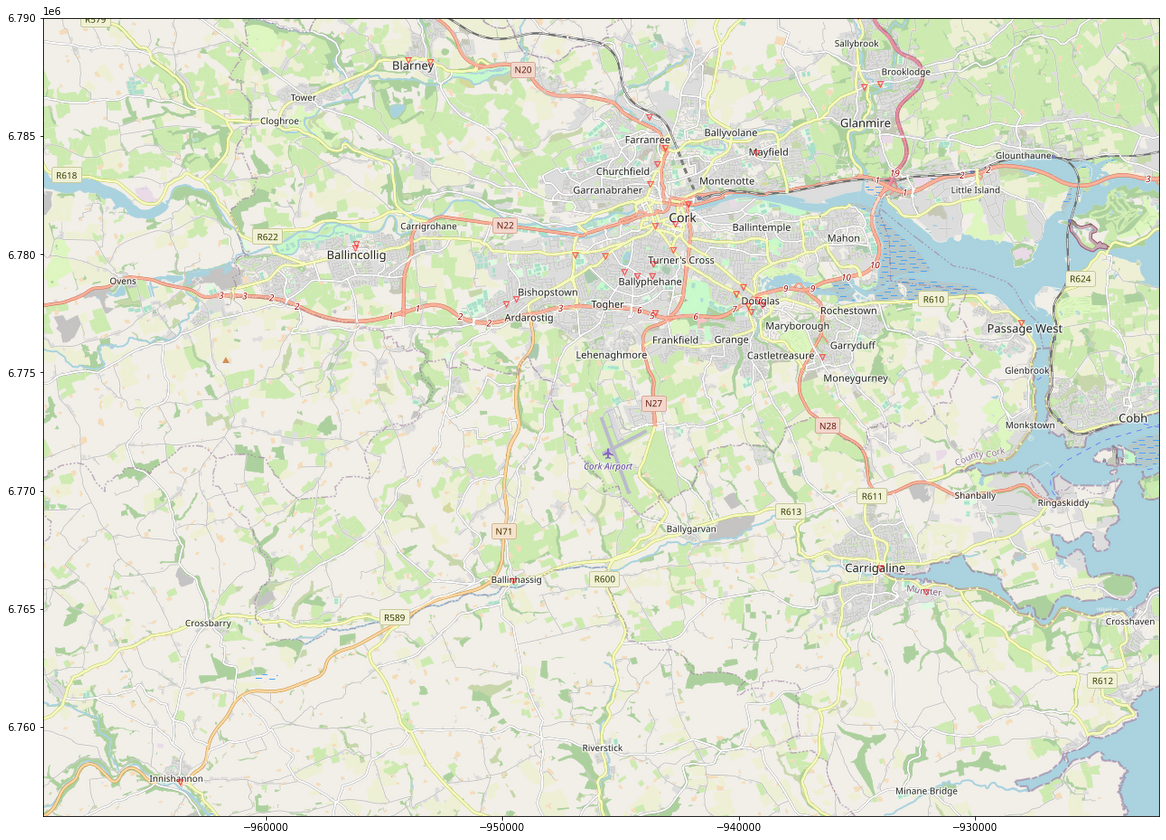

In [78]:
fig, ax = plt.subplots(figsize=(20,20))
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=700)
plotter.plot(ax)
ax.set_xlim(-969429.7340171158,-922220.5893273839)
ax.set_ylim(6756239.91206337,6790000.430036527)
df2[df2["fclass"]=="doctors"].plot(ax=ax, alpha = 0.4, color="red", marker='$\\bigtriangledown$',)
ax.figure.savefig('/content/amsterdam_data/plot.png' )

In [79]:
xy = np.vstack([df2["geometry"].x,df2["geometry"].y])
z = gaussian_kde(xy)(xy)

ValueError: ignored

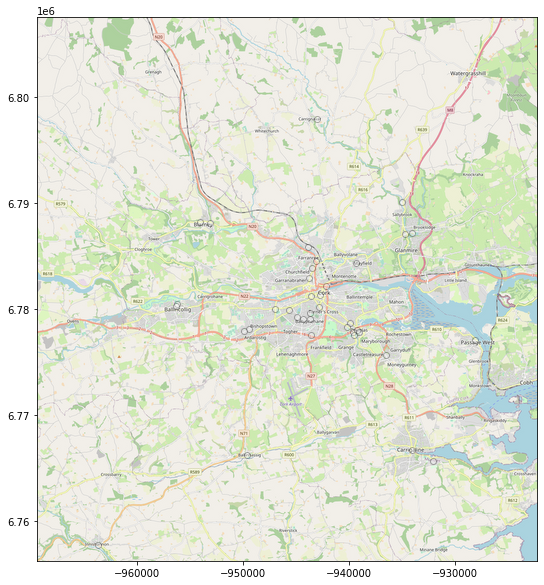

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
#ax.set_xlim(bounding_box[0]+2000, bounding_box[1])
#ax.set_ylim(bounding_box[2]+2000, bounding_box[3])
df2[df2["fclass"]=="doctors"].plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
ax.scatter(df2["geometry"].x, df2["geometry"].y, c=z, s=20, zorder=2, edgecolor='',  alpha=0.7)
ax.figure.savefig('/content/amsterdam_data/plot4.png', bbox_inches='tight')
     


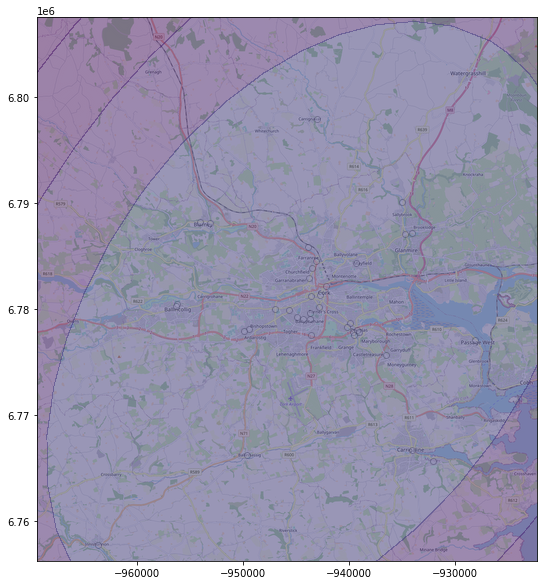

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
 
df2[df2["fclass"]=="doctors"].plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
sns.kdeplot(df2["geometry"].x, df2["geometry"].y, shade=True, alpha=0.5, cmap="viridis", shade_lowest=False)
ax.figure.savefig('/content/amsterdam_data/plot3.png', bbox_inches='tight')

In [83]:
xy = np.vstack([points["geometry"].x,points["geometry"].y])
z = gaussian_kde(xy)(xy)

##To be continued...